In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv("C:\\Users\\AANCHAL BORSE\\OneDrive\\Documents\\newpy\\train.csv.zip")


In [6]:
print(len(data))

42000


In [131]:
d = np.array(data)
x,y = d.shape
np.random.shuffle(d)
x_train = d[0:40000].T
y_train = x_train[0]
x_train = x_train[1:y]
x_train = x_train/255
x_test = d[40000:].T
y_test = x_test[0]
x_test = x_test[1:y]
x_test = x_test/255

In [132]:
print( x_train.shape,  x_test.shape)
n_x=x_train.shape[0]

(784, 40000) (784, 2000)


In [133]:
def  initialize_parameters( ):
    # var = 2 / n_x  # variance
    W1 = np.random.rand(10, n_x) * 0.01
    B1 = np.random.rand(10, 1) * 0.01
    W2 = np.random.rand(10, 10) * 0.01
    B2 = np.random.rand(10, 1) * 0.01  
    return W1, B1, W2, B2

In [134]:
def relu(Z):
    return np.maximum(Z,0)

def softmx(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [135]:
def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1 
    A1 = relu(Z1) 
    Z2 = W2.dot(A1) + B2 
    A2 = softmx(Z2) 
    return Z1, A1, Z2, A2

In [136]:
def label_encoded (Y):
    label_encoded = np.zeros((Y.size, Y.max() + 1))
    label_encoded[np.arange(Y.size), Y] = 1
    label_encoded = label_encoded.T
    return label_encoded
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    prob_Y = label_encoded (Y)
    dZ2 = A2 - prob_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2)  
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)  
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 =1/m  * np.sum(dZ1)    
    return dW1, dB1, dW2, dB2

In [137]:
def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * dB1
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * dB2
    return W1, B1, W2, B2

In [138]:
def get_predictions(A2):
    return np.argmax(A2, 0)
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size
def gradient_descent(X, Y, epochs, alpha):
    W1, B1, W2, B2 =  initialize_parameters()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 10 == 0 :
          print('epoch',i)
          predictions = get_predictions(A2)
          print('accuracy',get_accuracy(get_predictions(A2), Y))
    return W1, B1, W2, B2

In [139]:
W1, B1, W2, B2 = gradient_descent(x_train, y_train, 500, 0.05)

epoch 0
accuracy 0.098975
epoch 10
accuracy 0.0991
epoch 20
accuracy 0.0991
epoch 30
accuracy 0.0991
epoch 40
accuracy 0.0991
epoch 50
accuracy 0.0991
epoch 60
accuracy 0.0991
epoch 70
accuracy 0.0991
epoch 80
accuracy 0.0992
epoch 90
accuracy 0.09985
epoch 100
accuracy 0.1017
epoch 110
accuracy 0.104925
epoch 120
accuracy 0.111575
epoch 130
accuracy 0.1204
epoch 140
accuracy 0.1278
epoch 150
accuracy 0.13355
epoch 160
accuracy 0.136625
epoch 170
accuracy 0.139925
epoch 180
accuracy 0.14945
epoch 190
accuracy 0.173
epoch 200
accuracy 0.211175
epoch 210
accuracy 0.26325
epoch 220
accuracy 0.30455
epoch 230
accuracy 0.331625
epoch 240
accuracy 0.346275
epoch 250
accuracy 0.353775
epoch 260
accuracy 0.356875
epoch 270
accuracy 0.35885
epoch 280
accuracy 0.361025
epoch 290
accuracy 0.363875
epoch 300
accuracy 0.366775
epoch 310
accuracy 0.369725
epoch 320
accuracy 0.372325
epoch 330
accuracy 0.37565
epoch 340
accuracy 0.38005
epoch 350
accuracy 0.385575
epoch 360
accuracy 0.391325
epoch 37

In [140]:
def make_predictions(X, W1, B1, W2, B2):
    _,_,_,A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, B1, W2, B2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, B1, W2, B2)
    label = y_train[index]
    print("Prediction : ", prediction)
    print("Label : ", label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction :  [7]
Label :  7


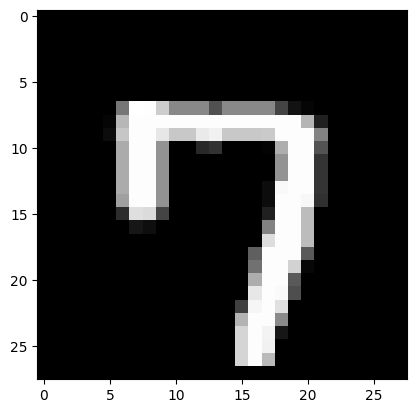

In [141]:
test_prediction(154, W1, B1, W2, B2,)